1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

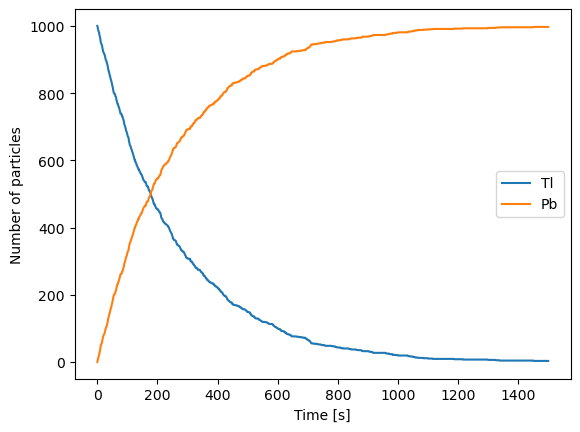

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si

N = 1000
tau = 3.052*60
time = np.arange(1500)

def p(t):
    return 1 - 2**(-t/tau)

Tl = []
Pb = []
prob_par = np.random.random(N)

for t in time:
    decay_part = prob_par[prob_par<p(t)].shape[0]
    Tl.append(N-decay_part)
    Pb.append(decay_part)
    
plt.plot(time, Tl, label='Tl')
plt.plot(time, Pb, label='Pb')
plt.xlabel('Time [s]')
plt.ylabel('Number of particles')
plt.legend()
plt.show()

z comes from an uniform distribution between 0 and 1. I want to create a distribution thai is able to follow the pdf:

$$
p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}
$$

$$
\int_{0}^{x(z)} p(x') dx' = -2^{-\frac{t(z)}{\tau}}+1 = z
$$

and thus:

$$
t(z) = - \tau log_2 (1-z)
$$

if we simulate z (with uniforme distribution) using this formula we are able to simulate the distribution of x 
that follow the distribution p(x).

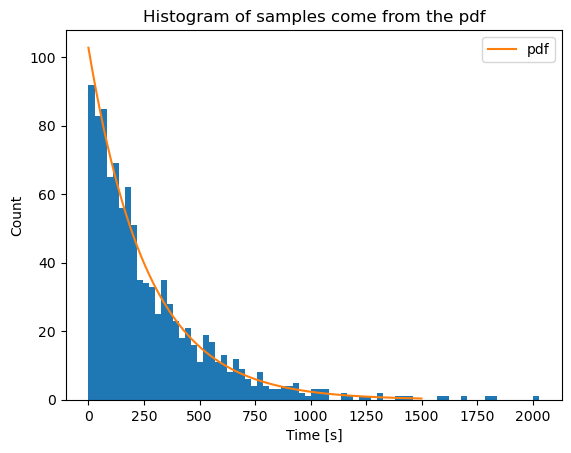

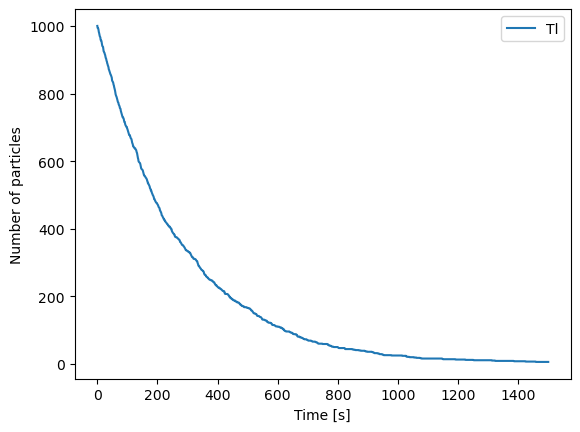

In [2]:
Tl = []
Pb = []

z = np.random.random(N)
tempo = -tau*np.log2(1-z)

def p2(t):
    return 2**(-t/tau)*np.log(2)/tau


n, bins, _ = plt.hist(tempo, bins=75)

A_histo = np.sum(n*(bins[1:]-bins[:-1]))
A_fun = si.trapz(p2(time), time)

plt.plot(time, p2(time)*A_histo/A_fun, label='pdf')
plt.title('Histogram of samples come from the pdf')
plt.xlabel('Time [s]')
plt.ylabel('Count')
plt.legend()
plt.show()

for t in time:
    decay_part = tempo[tempo<t].shape[0]
    Tl.append(N-decay_part)
    
plt.plot(time, Tl, label='Tl')
plt.xlabel('Time [s]')
plt.ylabel('Number of particles')
plt.legend()
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

The fraction of scattered particles with angles bigger than pi/2 is: 0.001587

 
 

Plot for scattered particles


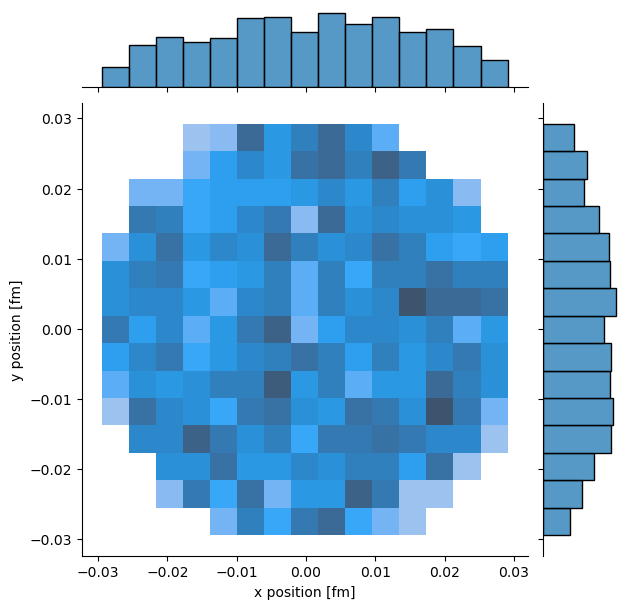


 
 

Plot for no scattered particles


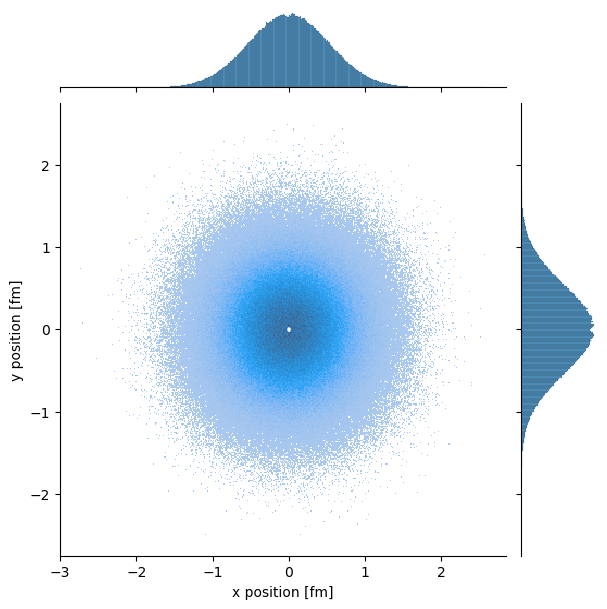

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# constants
e = 1.6*10**(-19)
a0 = 5.29*10**(-11)
eps0 = 8.85*10**(-12)

# parameters
Z = 79
E_MeV = 7.7
E_J = E_MeV * e * 10**6
sigma = a0/100
N=10**6


z = np.random.random(N)
theta = 2*np.pi*np.random.random(N)
r_squared = -2*sigma**2*np.log(z)
r = np.sqrt(r_squared)

beans_x = r*np.cos(theta)
beans_y = r*np.sin(theta)
beans = np.array([beans_x, beans_y])
b = np.sqrt(beans_x**2+beans_y**2)

theta = 2 * np.arctan((Z*e**2)/(2*np.pi*eps0*E_J*b))

mask = (np.abs(theta) >= np.pi/2)
inv_mask = (np.logical_xor(mask, np.ones(N)))


print('The fraction of scattered particles with angles bigger than pi/2 is:', mask[mask==True].shape[0]/N)


print('\n', '\n', '\n')
print('Plot for scattered particles')
sns.jointplot(x=beans_x[mask]*10**12, y=beans_y[mask]*10**12, kind='hist')
plt.xlabel('x position [fm]')
plt.ylabel('y position [fm]')
plt.show()

print('\n', '\n', '\n')
print('Plot for no scattered particles')
sns.jointplot(x=beans_x[inv_mask]*10**12, y=beans_y[inv_mask]*10**12, kind='hist')
plt.xlabel('x position [fm]')
plt.ylabel('y position [fm]')
plt.show()

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

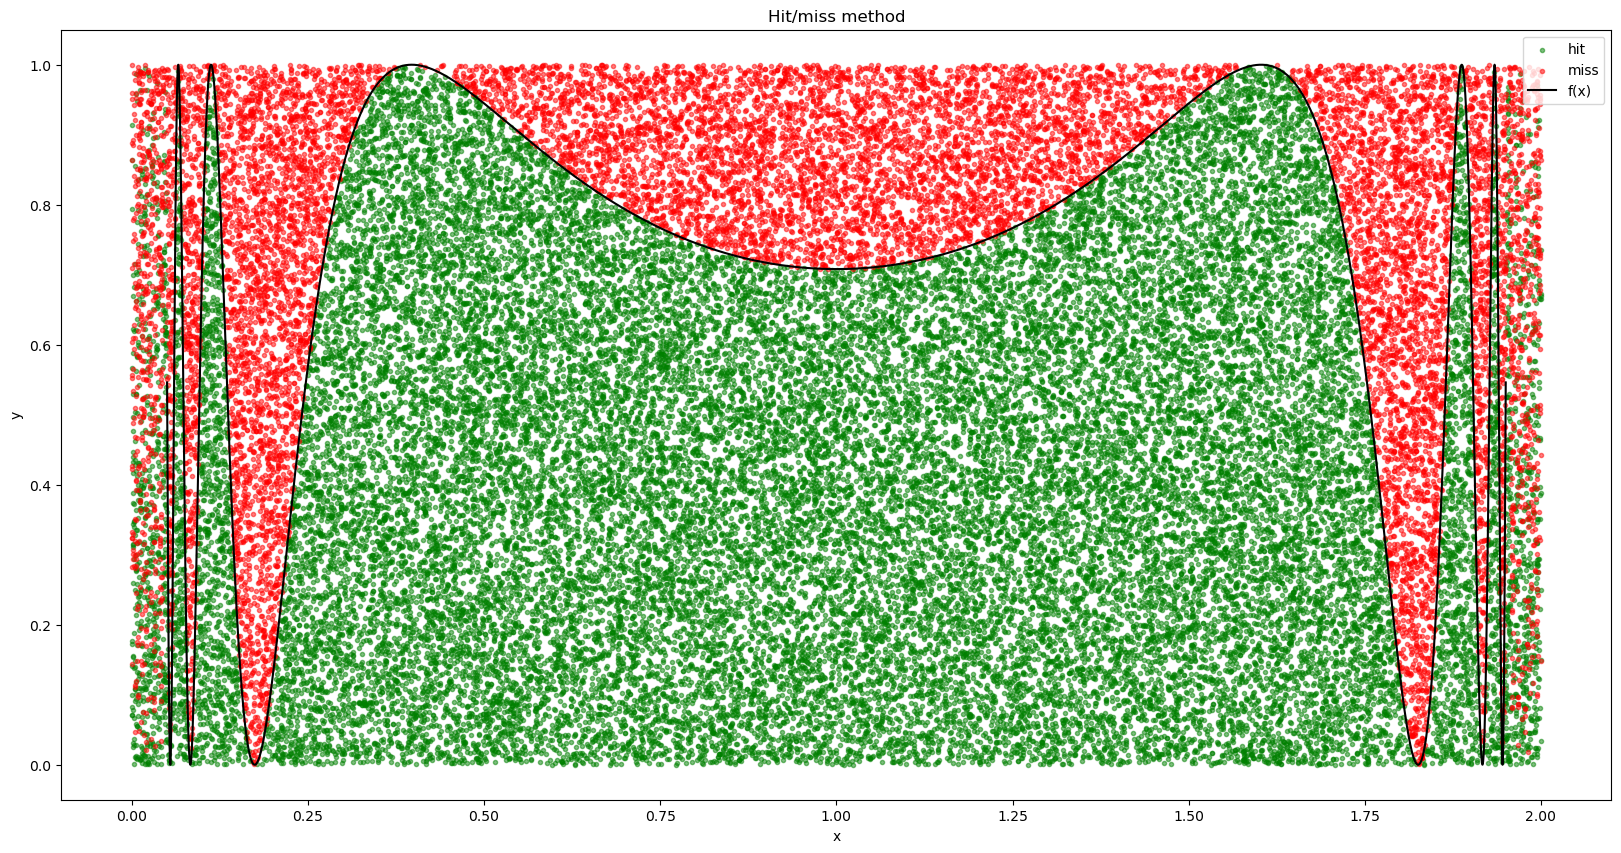

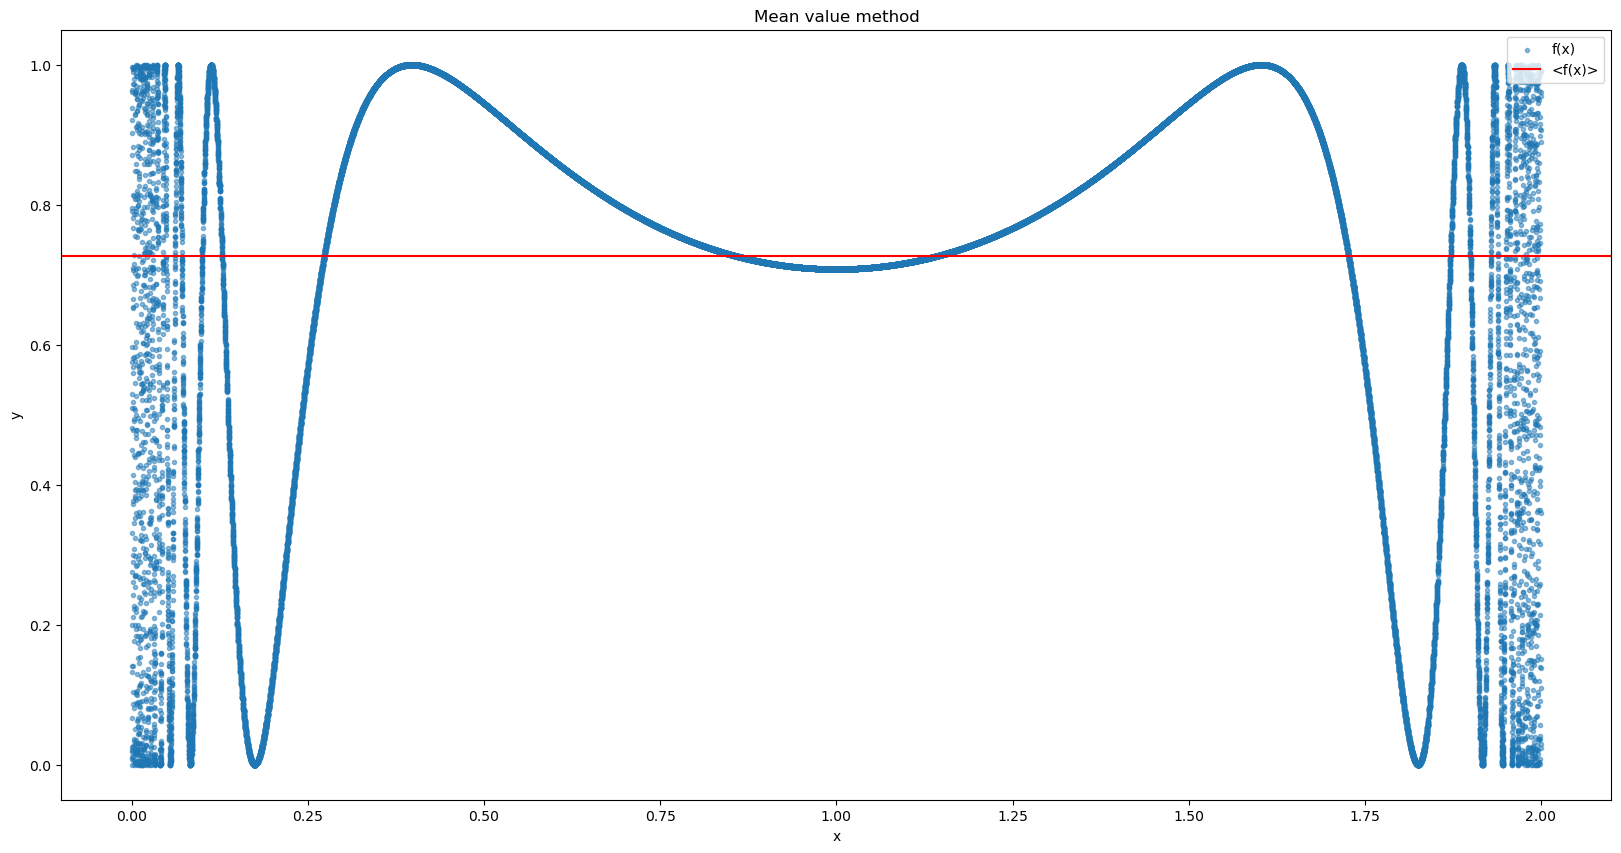

Hit/miss method carries to the result: 1.455 +- 0.008
Hit/miss method carries to the result: 1.453 +- 0.002
Results are of cuorse very similar and their compatibility is: 0.2


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def fun(x):
    return (np.sin(1/(x*(2-x))))**2

# method 1
N = 50000
x = 2*np.random.random(N)
y = np.random.random(N)
f = fun(x)

mask = np.array(f>=y)
inv_mask = np.logical_xor(mask, np.ones(N))

count = f[mask].shape[0]
I1 = count*2/N
err1 = np.sqrt(count)*2/N
lsp = np.linspace(0.05, 1.95, N)

plt.figure(figsize=(20,10))
plt.scatter(x[mask], y[mask], color='green', label='hit', marker='.', alpha=0.5)
plt.scatter(x[inv_mask], y[inv_mask], color='red', label='miss', alpha=0.5, marker='.')
plt.plot(lsp, fun(lsp), color='black', label='f(x)')
plt.legend(loc='upper right')
plt.title('Hit/miss method')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# method 2
I2 = np.sum(f)*2/N
err2 = 2*np.sqrt(np.var(f)/N)

plt.figure(figsize=(20,10))
plt.scatter(x, f, label='f(x)', alpha=0.5, marker='.')
plt.axhline(np.mean(f), color='red', label='<f(x)>')
plt.legend(loc='upper right')
plt.title('Mean value method')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('Hit/miss method carries to the result:', np.round(I1,3), '+-', np.round(err1,3))
print('Hit/miss method carries to the result:', np.round(I2,3), '+-', np.round(err2,3))
print('Results are of cuorse very similar and their compatibility is:', np.round(np.abs(I1-I2)/np.sqrt(err1**2+err2**2),2))

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [5]:
# Using mean value method

import numpy as np

def f(x):
    return int(np.sum(x**2)<=1)

def Vol(f, dim, N):
    x = 2*np.random.uniform(0, 1, size=(dim, N))-1
    somma = np.array([f(x[:,i]) for i in range(x.shape[1])]).sum()
    I = 2**(dim)/N*somma
    print('La sfera di dim:', dim, 'ha volume =', I, '\n')
    
    
Vol(f, 2, 10**5)
Vol(f, 10, 10**5) 

La sfera di dim: 2 ha volume = 3.1494000000000004 

La sfera di dim: 10 ha volume = 2.42688 



5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [6]:
import numpy as np

def f(x):
    return (x**(-0.5))/(np.e**x+1)

def w(x):
    return 1/np.sqrt(x)

N = 10**6
z = np.random.random(N)
x = z**2
int_wx = np.sum(w(z)*1/N)

I = 1/N*np.sum(f(x)/w(x))*int_wx


print('The result of the integral is', np.round(I, 2))

The result of the integral is 0.84
